<a href="https://colab.research.google.com/github/Sasikumar021/Data-Science/blob/main/Google_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price.csv to Google_Stock_Price (2).csv


In [ ]:
import pandas as pd

df = pd.read_csv('Google_Stock_Price.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   symbol     1761 non-null   object 
 1   date       1761 non-null   object 
 2   open       1761 non-null   float64
 3   high       1761 non-null   float64
 4   low        1761 non-null   float64
 5   close      1761 non-null   float64
 6   volume     1761 non-null   int64  
 7   adjclose   1761 non-null   float64
 8   dividends  1761 non-null   float64
 9   splits     1761 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 137.7+ KB


In [ ]:
df.head()

,symbol,open,high,low,close,volume,adjclose,dividends,splits
date,,,,,,,,,
2018-01-02,GOOG,52.417000,53.347000,52.261501,53.250000,24752000,53.059353,0.0,0.0
2018-01-03,GOOG,53.215500,54.314499,53.160500,54.124001,28604000,53.930225,0.0,0.0
2018-01-04,GOOG,54.400002,54.678501,54.200100,54.320000,20092000,54.125519,0.0,0.0
2018-01-05,GOOG,54.700001,55.212502,54.599998,55.111500,25582000,54.914188,0.0,0.0
2018-01-08,GOOG,55.111500,55.563499,55.081001,55.347000,20952000,55.148846,0.0,0.0


In [ ]:
df.describe()

,open,high,low,close,volume,adjclose,dividends,splits
count,1761.000000,1761.000000,1761.000000,1761.000000,1.761000e+03,1761.000000,1761.000000,1761.000000
mean,102.021411,103.171589,100.982265,102.092157,2.859376e+07,101.754831,0.000341,0.011357
std,39.637483,40.020994,39.274690,39.637305,1.317064e+07,39.547744,0.008250,0.476596
min,48.695000,50.176998,48.505501,48.811001,6.809800e+06,48.636250,0.000000,0.000000
25%,61.463001,62.043999,60.938499,61.496498,1.992200e+07,61.276325,0.000000,0.000000
50%,100.059998,101.658997,99.169998,100.739998,2.561200e+07,100.379326,0.000000,0.000000
75%,135.570007,137.070999,134.183502,135.990005,3.304600e+07,135.503128,0.000000,0.000000
max,198.529999,202.880005,196.690002,198.160004,1.241400e+08,198.160004,0.200000,20.000000


In [ ]:
df.isnull().sum()

,0
symbol,0
open,0
high,0
low,0
close,0
volume,0
adjclose,0
dividends,0
splits,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(1761, 10)

In [ ]:
df.columns

Index(['symbol', 'date', 'open', 'high', 'low', 'close', 'volume', 'adjclose',
       'dividends', 'splits'],
      dtype='object')

In [ ]:
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   symbol     1761 non-null   object 
 1   date       1761 non-null   object 
 2   open       1761 non-null   float64
 3   high       1761 non-null   float64
 4   low        1761 non-null   float64
 5   close      1761 non-null   float64
 6   volume     1761 non-null   int64  
 7   adjclose   1761 non-null   float64
 8   dividends  1761 non-null   float64
 9   splits     1761 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 137.7+ KB


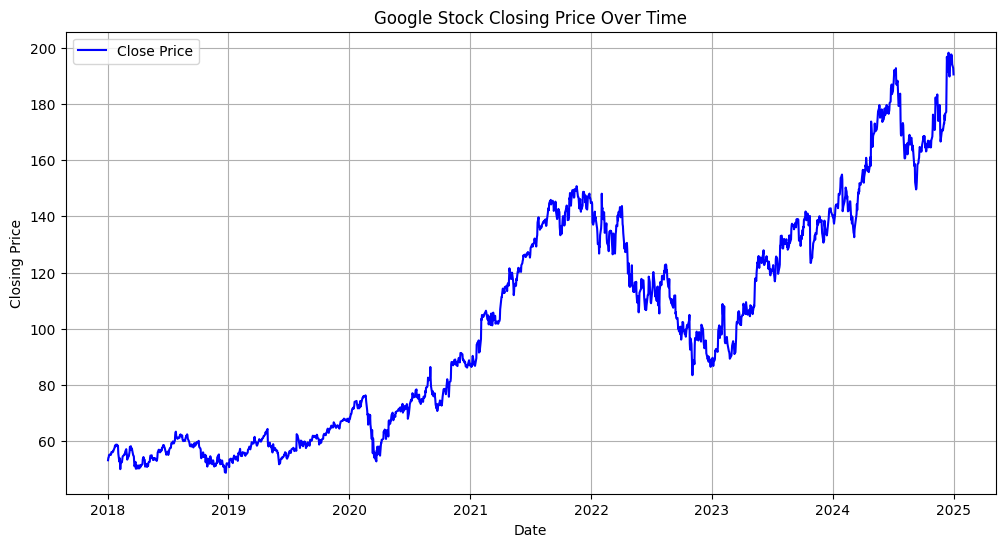

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], label='Close Price', color='blue')
plt.title('Google Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

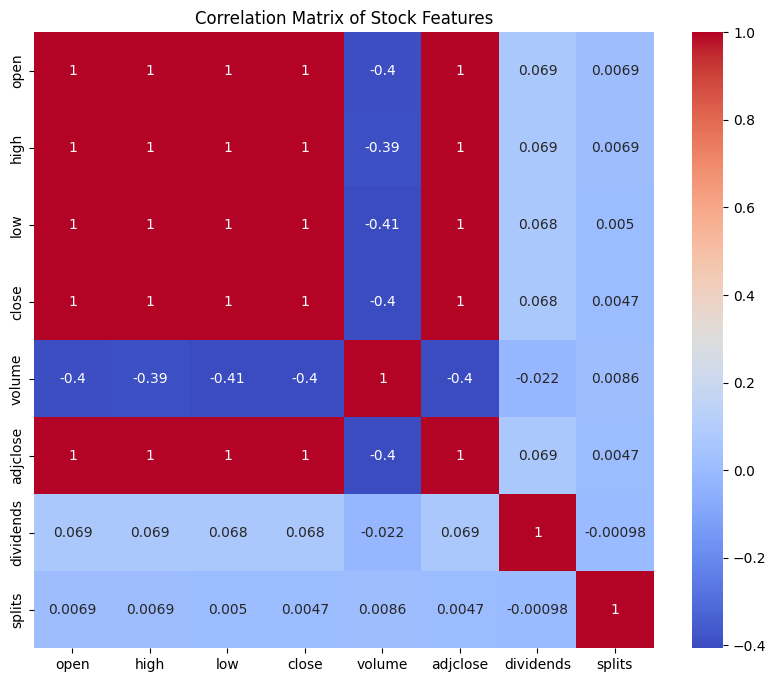

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Stock Features')
plt.show()

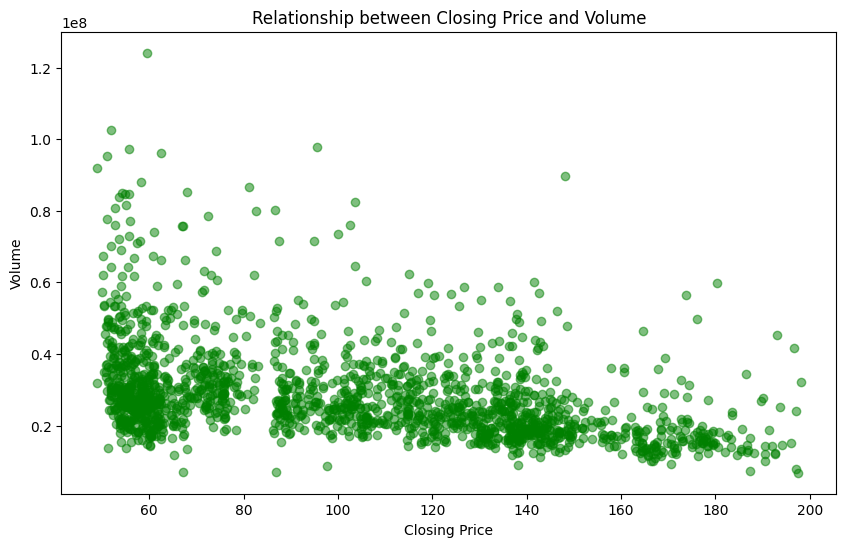

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['close'], df['volume'], alpha=0.5, color='green')
plt.title('Relationship between Closing Price and Volume')
plt.xlabel('Closing Price')
plt.ylabel('Volume')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Extract closing price data
close_data = df[['close']].values

# Normalize using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
close_data_norm = scaler.fit_transform(close_data)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Example function
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Assuming close_data_norm is already defined
seq_length = 60
X, y = create_sequences(close_data_norm, seq_length)

In [ ]:
import torch
import torch.nn as nn

class SimpleLSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=1):
        super(SimpleLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
def train_model(model, train_loader, num_epochs=20, learning_rate=0.001):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    model.train()

    for epoch in range(num_epochs):
        epoch_losses = []
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            epoch_losses.append(loss.item())
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {np.mean(epoch_losses):.6f}")
    return model

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Create Dataset and DataLoader
train_dataset = TensorDataset(X_tensor, y_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [ ]:
def train_model(model, train_loader, num_epochs=100, learning_rate=0.001):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        model.train()
        for inputs, targets in train_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets.view(-1, 1))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

    return model

In [ ]:
simple_model = SimpleLSTM()
print("Training Simple LSTM Model")
simple_model = train_model(simple_model, train_loader, num_epochs=100)

Training Simple LSTM Model
Epoch [10/100], Loss: 0.0009
Epoch [20/100], Loss: 0.0008
Epoch [30/100], Loss: 0.0005
Epoch [40/100], Loss: 0.0004
Epoch [50/100], Loss: 0.0002
Epoch [60/100], Loss: 0.0003
Epoch [70/100], Loss: 0.0003
Epoch [80/100], Loss: 0.0003
Epoch [90/100], Loss: 0.0007
Epoch [100/100], Loss: 0.0008


In [ ]:
medium_model = MediumLSTM()
print("\nTraining Medium LSTM Model")
medium_model = train_model(medium_model, train_loader, num_epochs=100)


Training Medium LSTM Model
Epoch [10/100], Loss: 0.0008
Epoch [20/100], Loss: 0.0007
Epoch [30/100], Loss: 0.0007
Epoch [40/100], Loss: 0.0005
Epoch [50/100], Loss: 0.0008
Epoch [60/100], Loss: 0.0006
Epoch [70/100], Loss: 0.0007
Epoch [80/100], Loss: 0.0007
Epoch [90/100], Loss: 0.0004
Epoch [100/100], Loss: 0.0005


In [ ]:
import torch.nn as nn

class ComplexLSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=100, num_layers=2, dropout=0.2):
        super(ComplexLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                            dropout=dropout, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.fc1 = nn.Linear(hidden_size, 50)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(50, 1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.dropout(out[:, -1, :])
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
from tqdm import tqdm

def train_model(model, train_loader, num_epochs=100, learning_rate=0.001):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in tqdm(range(num_epochs), desc="Training"):
        model.train()
        for inputs, targets in train_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets.view(-1, 1))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    return model

In [ ]:
complex_model = ComplexLSTM()
complex_model = train_model(complex_model, train_loader, num_epochs=20)

Training: 100%|██████████| 20/20 [01:23<00:00,  4.17s/it]


In [ ]:
train_size = int(len(X) * 0.8)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

In [ ]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [ ]:
pred_simple = predict(simple_model, X_test_tensor)
pred_medium = predict(medium_model, X_test_tensor)
pred_complex = predict(complex_model, X_test_tensor)

In [ ]:
test_dates = df.index[seq_length + train_size:]

In [ ]:
df['date'] = pd.to_datetime(df['date'])  # Adjust column name if needed
df.set_index('date', inplace=True)

In [ ]:
test_dates = df.index[seq_length + train_size:]

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
close_data_norm = scaler.fit_transform(close_data)

In [ ]:
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
pred_simple_inv = scaler.inverse_transform(pred_simple)
pred_medium_inv = scaler.inverse_transform(pred_medium)
pred_complex_inv = scaler.inverse_transform(pred_complex)

In [ ]:
pred_simple = pred_simple.reshape(-1, 1)
pred_medium = pred_medium.reshape(-1, 1)
pred_complex = pred_complex.reshape(-1, 1)

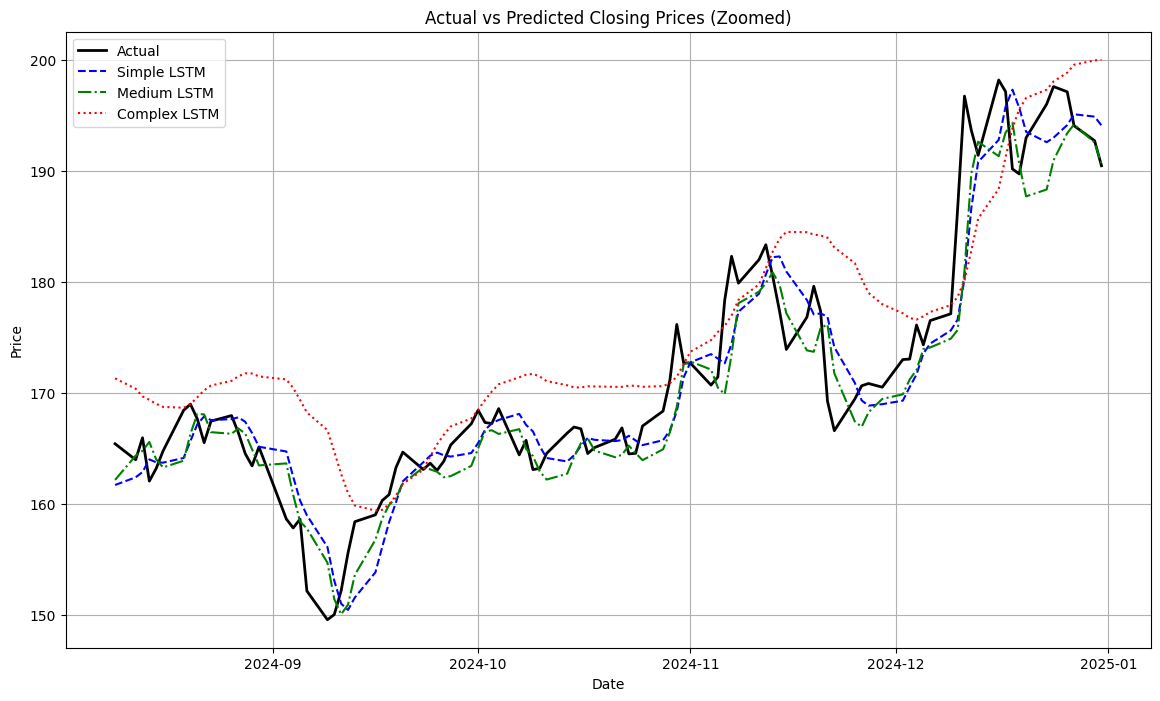

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(test_dates[-100:], y_test_inv[-100:], label='Actual', color='black', linewidth=2)
plt.plot(test_dates[-100:], pred_simple_inv[-100:], label='Simple LSTM', linestyle='--', color='blue')
plt.plot(test_dates[-100:], pred_medium_inv[-100:], label='Medium LSTM', linestyle='-.', color='green')
plt.plot(test_dates[-100:], pred_complex_inv[-100:], label='Complex LSTM', linestyle=':', color='red')
plt.title('Actual vs Predicted Closing Prices (Zoomed)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

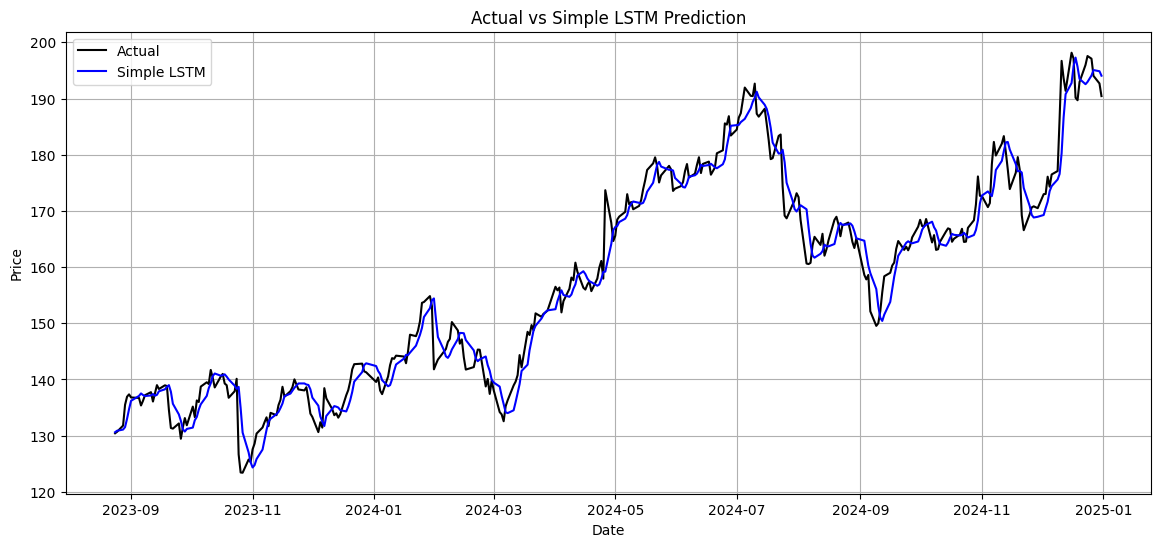

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(test_dates, y_test_inv, label='Actual', color='black')
plt.plot(test_dates, pred_simple_inv, label='Simple LSTM', color='blue')
plt.title('Actual vs Simple LSTM Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

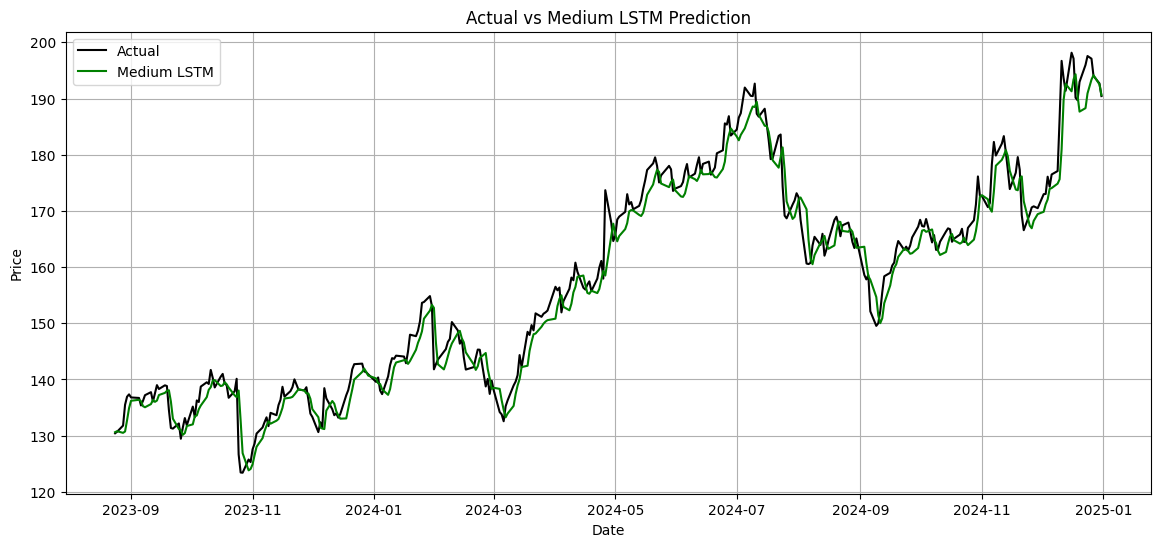

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(test_dates, y_test_inv, label='Actual', color='black')
plt.plot(test_dates, pred_medium_inv, label='Medium LSTM', color='green')
plt.title('Actual vs Medium LSTM Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

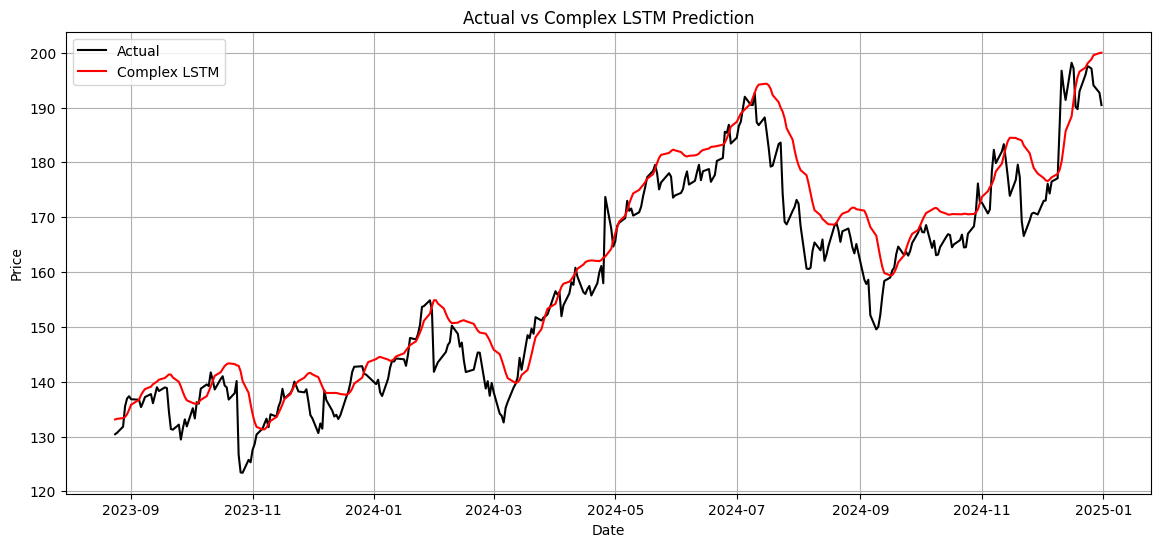

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(test_dates, y_test_inv, label='Actual', color='black')
plt.plot(test_dates, pred_complex_inv, label='Complex LSTM', color='red')
plt.title('Actual vs Complex LSTM Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
last_sequence = close_data_norm[-seq_length:]  # shape: (60, 1)

In [ ]:
import torch

model_input = torch.tensor(last_sequence, dtype=torch.float32).unsqueeze(0)  # shape: (1, 60, 1)

In [ ]:
model = simple_model  # or medium_model / complex_model
model.eval()

future_predictions = []

with torch.no_grad():
    for _ in range(10):
        pred = model(model_input)  # shape: (1, 1)
        future_predictions.append(pred.item())

        # Append prediction to the sequence and slide the window
        new_input = torch.tensor([[pred.item()]], dtype=torch.float32)
        model_input = torch.cat((model_input[:, 1:, :], new_input.unsqueeze(0)), dim=1)

In [ ]:
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

In [ ]:
from datetime import timedelta

last_date = df.index[-1]  # assuming df index is datetime
forecast_dates = [last_date + timedelta(days=i+1) for i in range(10)]

In [ ]:
def forecast_next_days(model, last_sequence, days, scaler):
    model.eval()
    preds = []
    current_seq = last_sequence.tolist()

    for _ in range(days):
        input_seq = torch.tensor(current_seq[-60:], dtype=torch.float32).unsqueeze(0).unsqueeze(-1).to(device)
        with torch.no_grad():
            pred = model(input_seq).item()
        preds.append(pred)
        current_seq.append(pred)

    preds = np.array(preds).reshape(-1, 1)
    preds_inv = scaler.inverse_transform(preds)
    return preds_inv

In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
simple_model.to(device)
medium_model.to(device)
complex_model.to(device)

ComplexLSTM(
  (lstm): LSTM(1, 100, num_layers=2, batch_first=True, dropout=0.2)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=100, out_features=50, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=50, out_features=1, bias=True)
)

In [ ]:
def forecast_next_days(model, last_sequence, days, scaler):
    model.eval()
    current_seq = last_sequence.copy()  # Start with the last known 60 days
    predictions = []

    for _ in range(days):
        input_seq = torch.tensor(current_seq[-60:], dtype=torch.float32).reshape(1, 60, 1).to(device)

        with torch.no_grad():
            pred = model(input_seq).item()

        predictions.append(pred)
        current_seq = np.append(current_seq, pred)  # Add prediction to sequence

    # Convert predictions back to original scale
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
    return predictions

In [ ]:
last_sequence = close_data_norm[-60:]  # last 60 values of normalized close prices

forecast_simple_inv = forecast_next_days(simple_model, last_sequence, 10, scaler)
forecast_medium_inv = forecast_next_days(medium_model, last_sequence, 10, scaler)
forecast_complex_inv = forecast_next_days(complex_model, last_sequence, 10, scaler)

In [ ]:
from datetime import timedelta

last_date = df.index[-1]
forecast_dates = [last_date + timedelta(days=i+1) for i in range(10)]

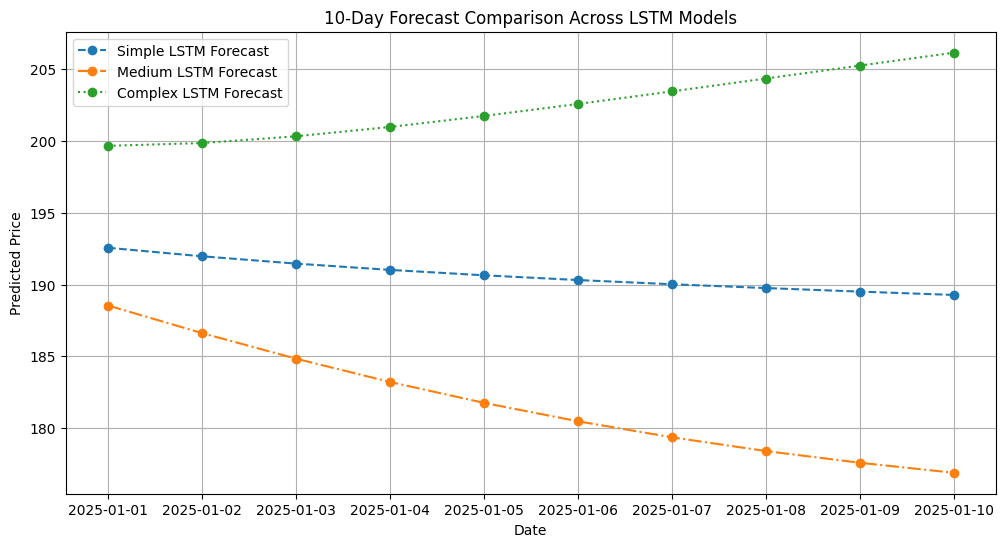

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(forecast_dates, forecast_simple_inv, marker='o', linestyle='--', label='Simple LSTM Forecast')
plt.plot(forecast_dates, forecast_medium_inv, marker='o', linestyle='-.', label='Medium LSTM Forecast')
plt.plot(forecast_dates, forecast_complex_inv, marker='o', linestyle=':', label='Complex LSTM Forecast')
plt.title("10-Day Forecast Comparison Across LSTM Models")
plt.xlabel("Date")
plt.ylabel("Predicted Price")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Simple LSTM': forecast_simple_inv.flatten(),
    'Medium LSTM': forecast_medium_inv.flatten(),
    'Complex LSTM': forecast_complex_inv.flatten()
})
print("Forecasted values for the next 10 days:")
print(forecast_df)

Forecasted values for the next 10 days:
        Date  Simple LSTM  Medium LSTM  Complex LSTM
0 2025-01-01   192.560142   188.534670    199.668483
1 2025-01-02   191.968220   186.611131    199.862883
2 2025-01-03   191.457002   184.829969    200.333063
3 2025-01-04   191.018957   183.205480    200.983898
4 2025-01-05   190.641749   181.749344    201.749995
5 2025-01-06   190.312343   180.465406    202.586417
6 2025-01-07   190.019168   179.349206    203.462755
7 2025-01-08   189.752770   178.389680    204.358749
8 2025-01-09   189.505778   177.571338    205.260973
9 2025-01-10   189.272637   176.876287    206.160741
